# **Proyecto de validación de calificaciones**

## Talento Tech - Módulo de Inteligencia Artificial/Básico
## *Elaborado por José Daniel Ayala Barrera*
### Abril 2024

# **Importamos** **librerias**.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob # El módulo glob, que es la abreviatura de global, es una función que se utiliza para buscar archivos que coincidan con un patrón o nombre de archivo
            # específico. Puede utilizarse para buscar archivos xlsx, csv, txt y también para buscar un determinado texto en un lote de archivos.
import matplotlib.pyplot as plt

Para garantizar persistencia en la carga y lectura de los archivos, clonamos los mismos desde mi repositorio de github

In [2]:
# borramos directorio base si existe

!rm -rf /content/TalentoTech

In [3]:
# clonamos repositorio para cargar archivos

!git clone https://github.com/danielxxi/TalentoTech.git

Cloning into 'TalentoTech'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 402.90 KiB | 5.10 MiB/s, done.
Resolving deltas: 100% (1/1), done.


Utilizamos siempre rutas absolutas para especificar la ruta de la carpeta para evitar cualquier confusión con respecto al directorio de trabajo. Acá, hacemos uso del módulo *os* para que las rutas sean independientes de la plataforma:



In [4]:
path = os.path.abspath('/content/TalentoTech') # definimos path

In [5]:
# desplegamos los archivos cargados:
print(os.listdir(path))

['README.md', 'Calificaciones de 2758313 ADSO 21_04_2024, 16 31.xlsx', '.git', 'TalentoTech.png', 'Calificaciones de 2758315 ADSO 21_04_2024, 15 35.xlsx', 'Calificaciones de 2758314 ADSO 21_04_2024, 16 21.xlsx', 'Calificaciones de 2758316 ADSO 22_04_2024, 15_11.xlsx']


Una vez que hemos definido la ruta de los archivos de Excel, procedemos a usar la librería *pandas* para importar los archivos a los dataframes pandas de Python. Utilizaremos un bucle for para recorrer todos los archivos Excel del directorio e importarlos a pandas. Como buena práctica, implementamos un módulo de gestión de errores para anticiparnos a l posibles. Acá, usamos bloques **try** y **except** para gestionar posibles errores al leer archivos de Excel.

In [6]:
all_files = glob.glob(path + "/*.xlsx") # Definimos búsqueda de archivos xlsx
li = []
for filename in all_files:
    try: # Bloque de manejo de errores
        df = pd.read_excel(filename, index_col=None, header=1, usecols='D, G:I, M').assign(archivo=filename) # obviamos el primer registro (encabezado) y traemos columnas deforma específica
        li.append(df)
    except Exception as e:
        print(f"Error leyendo {filename}: {e}")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Ahora concatenamos todos los archivos de Excel en un dataframe consolidado utilizando la biblioteca *pandas*. Usaremos la función concat() para concatenar todos los dataframes de la lista 'li' en un dataframe.

In [7]:
df_califica = pd.concat(li, axis=0, ignore_index=True) # concatenamos los archivos

# **Análisis Exploratorio de Datos (EDA)**

In [8]:
row_count_concat = len(df_califica) # guardamos el tamaño del dataframe en una variabl

print(f'los 4 DataFrames concatenados tienen, en total,  {row_count_concat} registros.') # imprimimos en pantalla

los 4 DataFrames concatenados tienen, en total,  2123 registros.


In [9]:
df_califica.info() #desplegamos información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Nombre completo                  2123 non-null   object        
 1   Dirección de correo electrónico  2123 non-null   object        
 2   Tareas                           2123 non-null   object        
 3   Fecha de vencimiento             2123 non-null   datetime64[ns]
 4   Puntos                           155 non-null    float64       
 5   archivo                          2123 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 99.6+ KB


In [10]:
print(df_califica.shape) # mostramos dimensión del dataframe: 2123 registros, 5 columnas

(2123, 6)


In [11]:
df_califica.head(5) # mostramos dataframe

,Nombre completo,Dirección de correo electrónico,Tareas,Fecha de vencimiento,Puntos,archivo
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN,/content/TalentoTech/Calificaciones de 2758313...
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN,/content/TalentoTech/Calificaciones de 2758313...
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN,/content/TalentoTech/Calificaciones de 2758313...
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN,/content/TalentoTech/Calificaciones de 2758313...
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN,/content/TalentoTech/Calificaciones de 2758313...


In [12]:
df_califica.tail(5) #leemos últimos 5 registros

,Nombre completo,Dirección de correo electrónico,Tareas,Fecha de vencimiento,Puntos,archivo
2118,delzombiejj,delzombiejj_gmail.com#EXT#@sena4.onmicrosoft.com,RAP_27_ GA3_AA2_EV02_RG_Audio,2024-03-31,NaN,/content/TalentoTech/Calificaciones de 2758316...
2119,Alemoxis,Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com,RAP_27_ GA3_AA2_EV02_RG_Audio,2024-03-31,NaN,/content/TalentoTech/Calificaciones de 2758316...
2120,castrom,castrom_ucentral.edu.co#EXT#@sena4.onmicrosoft...,RAP_27_ GA3_AA2_EV02_RG_Audio,2024-03-31,NaN,/content/TalentoTech/Calificaciones de 2758316...
2121,andrescabrales79,andrescabrales79_gmail.com#EXT#@sena4.onmicros...,RAP_27_ GA3_AA2_EV02_RG_Audio,2024-03-31,NaN,/content/TalentoTech/Calificaciones de 2758316...
2122,andreapr822,andreapr822_gmail.com#EXT#@sena4.onmicrosoft.com,RAP_27_ GA3_AA2_EV02_RG_Audio,2024-03-31,NaN,/content/TalentoTech/Calificaciones de 2758316...


In [13]:
df_califica.dtypes.value_counts() # reportamos cantidad de columnas existentes por cada tipo de datos

object            4
datetime64[ns]    1
float64           1
Name: count, dtype: int64

**Limpieza del dataset:**

*   Eliminar datos faltantes
*   Eliminar registros repetidos










In [14]:
df_califica.isna().sum() # mostramos la suma de registros que no tienen valor alguno, esto por cada característica o columna

Nombre completo                       0
Dirección de correo electrónico       0
Tareas                                0
Fecha de vencimiento                  0
Puntos                             1968
archivo                               0
dtype: int64

Graficamos dataframa con valores NaN. Vemos que la característica "Puntos" posee la mayor cantidad de eventos con valores de este tipo.

Para esto usamos librería seaborn (sns) y funciones lambda

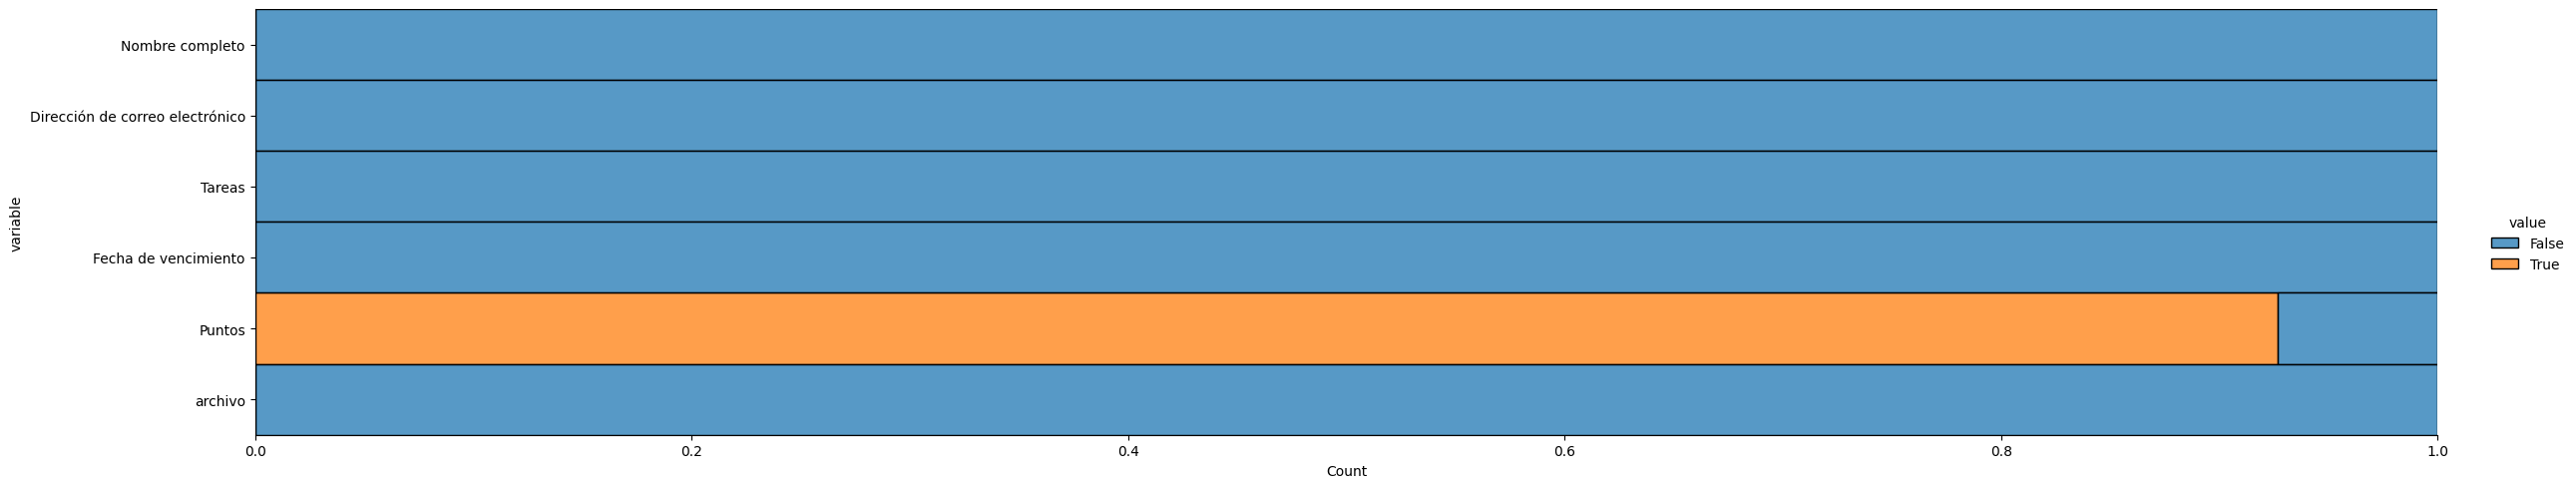

In [15]:
df_califica.isnull().melt().pipe(lambda df: # usamos función lambda
                                 sns.displot(data=df, y='variable',
                                             hue='value',
                                             multiple='fill', aspect=5))


<Axes: >

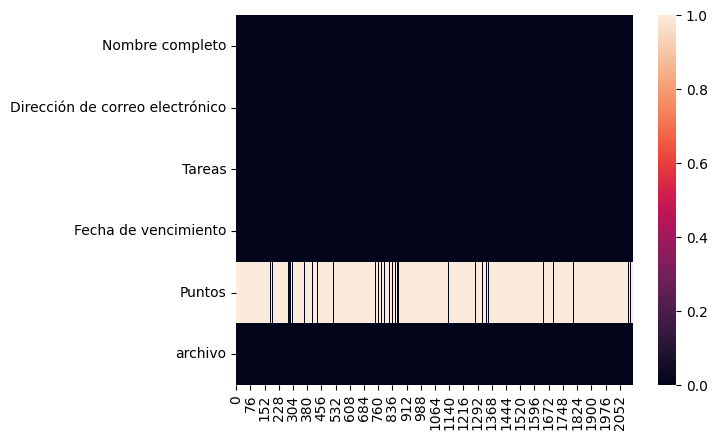

In [16]:
df_califica.isnull().transpose().pipe(lambda df:(sns.heatmap(data=df)))

In [17]:
df_califica.head() #desplegamos información del dataframe

,Nombre completo,Dirección de correo electrónico,Tareas,Fecha de vencimiento,Puntos,archivo
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN,/content/TalentoTech/Calificaciones de 2758313...
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN,/content/TalentoTech/Calificaciones de 2758313...
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN,/content/TalentoTech/Calificaciones de 2758313...
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN,/content/TalentoTech/Calificaciones de 2758313...
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN,/content/TalentoTech/Calificaciones de 2758313...


In [18]:
df_califica = df_califica.fillna(0) # reemplazamos valor nulos o NaN por cero

In [19]:
df_califica.head() #desplegamos información del dataframe

,Nombre completo,Dirección de correo electrónico,Tareas,Fecha de vencimiento,Puntos,archivo
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...


In [20]:
df_califica.isnull() # analizamos si existen valores nulos en el dataframe

,Nombre completo,Dirección de correo electrónico,Tareas,Fecha de vencimiento,Puntos,archivo
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2118,False,False,False,False,False,False
2119,False,False,False,False,False,False
2120,False,False,False,False,False,False
2121,False,False,False,False,False,False


In [21]:
df_califica.isnull().any()

Nombre completo                    False
Dirección de correo electrónico    False
Tareas                             False
Fecha de vencimiento               False
Puntos                             False
archivo                            False
dtype: bool

In [22]:
# Eliminar registros repetidos o duplicados
df_califica = df_califica.drop_duplicates()

In [23]:
print(df_califica.shape)

(2123, 6)


In [24]:
df_califica.columns = df_califica.columns.str.replace(' ', '_') #renombramos columnas para mejor manejo con las librerias

In [25]:
df_califica.head(5)

,Nombre_completo,Dirección_de_correo_electrónico,Tareas,Fecha_de_vencimiento,Puntos,archivo
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...


Ahor asignamos calificación de acuerdo a los puntos obtenidos:



*   'A' con atributo "Puntos" mayor o igual a 70
*   'D' con atributo "Puntos" menor a 70



In [26]:
df_califica['Calificación'] = np.where(df_califica['Puntos']>= 70, 'A', 'D')

In [27]:
df_califica.head()

,Nombre_completo,Dirección_de_correo_electrónico,Tareas,Fecha_de_vencimiento,Puntos,archivo,Calificación
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...,D
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...,D
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...,D
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...,D
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,/content/TalentoTech/Calificaciones de 2758313...,D


In [28]:
df_califica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Nombre_completo                  2123 non-null   object        
 1   Dirección_de_correo_electrónico  2123 non-null   object        
 2   Tareas                           2123 non-null   object        
 3   Fecha_de_vencimiento             2123 non-null   datetime64[ns]
 4   Puntos                           2123 non-null   float64       
 5   archivo                          2123 non-null   object        
 6   Calificación                     2123 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 116.2+ KB


In [29]:
df_califica = df_califica.iloc[:, [0, 1, 5, 2, 3, 6]]

In [30]:
df_califica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Nombre_completo                  2123 non-null   object        
 1   Dirección_de_correo_electrónico  2123 non-null   object        
 2   archivo                          2123 non-null   object        
 3   Tareas                           2123 non-null   object        
 4   Fecha_de_vencimiento             2123 non-null   datetime64[ns]
 5   Calificación                     2123 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 99.6+ KB


In [38]:
# Creamos dataframe a partir de la agrupación
#df_califica_final = df_califica.groupby(['Nombre_completo', 'Dirección_de_correo_electrónico', 'archivo','Tareas','Fecha_de_vencimiento', 'Calificación'], as_index = False).count()
df_califica_final = df_califica.groupby(['Nombre_completo', 'Dirección_de_correo_electrónico', 'archivo','Tareas','Fecha_de_vencimiento', 'Calificación'], as_index = False).size().reset_index()

In [39]:
df_califica_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            2123 non-null   int64         
 1   Nombre_completo                  2123 non-null   object        
 2   Dirección_de_correo_electrónico  2123 non-null   object        
 3   archivo                          2123 non-null   object        
 4   Tareas                           2123 non-null   object        
 5   Fecha_de_vencimiento             2123 non-null   datetime64[ns]
 6   Calificación                     2123 non-null   object        
 7   size                             2123 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 132.8+ KB


In [35]:
# Borramos la última columna
df_califica_final = df_califica_final.drop(df_califica_final.columns[[0]], axis=1, inplace=True)


In [96]:
# Reseteamos índices del dataframe
df_califica_final = df_califica_final.reset_index()\
.rename(columns = {'index': 'Nombre_completo', 0: 'Dirección_de_correo_electrónico', 1: 'archivo', 2: 'Tareas', 3: 'Fecha_de_vencimiento', 4: 'Calificación'})

In [97]:
# Imprimimoscolumnas de dataframe
print(df.columns)

Index(['Nombre completo', 'Dirección de correo electrónico', 'Tareas',
       'Fecha de vencimiento', 'Puntos', 'archivo'],
      dtype='object')


In [98]:
df_califica_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Nombre_completo                  2123 non-null   int64         
 1   Nombre_completo                  2123 non-null   object        
 2   Dirección_de_correo_electrónico  2123 non-null   object        
 3   archivo                          2123 non-null   object        
 4   Tareas                           2123 non-null   object        
 5   Fecha_de_vencimiento             2123 non-null   datetime64[ns]
 6   Calificación                     2123 non-null   object        
 7   size                             2123 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 132.8+ KB


In [ ]:
df_califica_final = df_califica_final.convert_dtypes() # ajustamos tipos de datos del dataframe

In [ ]:
df_califica_final. # vemos tipos de datos

In [ ]:
df_califica_final.shape

In [ ]:
df_califica_final.head()

In [ ]:
# creamos dataframe de reporte a partir de una tabla pivote

df_califica_report = df_califica_final.pivot(index=['Nombre_completo','Dirección_de_correo_electrónico','Fecha_de_vencimiento'], columns='Tareas', values='Calificación')

In [ ]:
df_califica_report = df_califica_report.replace(np.nan, ' ') #reemplazamos valores NaN por espacios en blanco

In [ ]:
df_califica_report.head(5)

In [ ]:
# Generamos excel

df_califica_report.to_excel("calificaciones_total.xlsx", sheet_name="calificaciones")

# Ahora vamos a hacer el mismo ejercicio, pero con un solo archivo

In [ ]:
# importar los datos
df_califica_1=pd.read_excel(path + "/Calificaciones de 2758313 ADSO 21_04_2024, 16 31.xlsx", header=1, usecols='D, G:I, M') # obviamos el primer registro (encabezado) y traemos columnas deforma específica

In [ ]:
row_count1 = len(df_califica_1)

print(f'El primer DataFrame tiene {row_count1} registros.')

In [ ]:
df_califica_1.columns = df_califica_1.columns.str.replace(' ', '_') #renombramos columnas

In [ ]:
df_califica_1 = df_califica_1.fillna(0) # poblamos valores NaN con ceros

In [ ]:
df_califica_1.head()

In [ ]:
df_califica_1['Calificación'] = np.where(df_califica_1['Puntos']>= 70, 'A', 'D') #reemplazamos valores

In [ ]:
df_califica_1.head()

In [ ]:
# creamos dataframe de reporte a partir de una tabla pivote

df_califica_1_final = df_califica_1.groupby(['Nombre_completo', 'Dirección_de_correo_electrónico', 'Tareas','Fecha_de_vencimiento', 'Calificación'])['Nombre_completo'].count()

In [ ]:
# asignamos nombres a columnas

df_califica_1_final.columns = ['Nombre_completo', 'Dirección_de_correo_electrónico'	,'Tareas','Fecha_de_vencimiento', 'Calificación', 'Count']

In [ ]:
df_califica_1_final = df_califica_1_final.to_frame() #convertimos a dateframe

In [ ]:
df_califica_1_final = df_califica_1_final.loc[:, df_califica_1_final.columns[:-1]]

In [ ]:
#reseteamos indices del dataframe

df_califica_1_final = df_califica_1_final.reset_index()\
.rename(columns = {'index': 'Nombre_completo', 0: 'Dirección_de_correo_electrónico', 1: 'Tareas', 2: 'Fecha_de_vencimiento', 3: 'Calificación'})

In [ ]:
df_califica_1_final = df_califica_1_final.convert_dtypes() #ajustamos tipos de datos

In [ ]:
df_califica_1_report = df_califica_1_final.pivot(index=['Nombre_completo','Dirección_de_correo_electrónico','Fecha_de_vencimiento'], columns='Tareas', values='Calificación')

In [ ]:
df_califica_1_report = df_califica_1_report.replace(np.nan, ' ')

In [ ]:
df_califica_1_report.head()

In [ ]:
# Generamos excel

df_califica_report.to_excel("calificaciones_1.xlsx", sheet_name="calificaciones")